In [1]:
import pandas as pd

train_data = pd.read_excel('./drive-download-20221215T064857Z-001/df_total_train.xlsx')
test_data = pd.read_excel('./drive-download-20221215T064857Z-001/df_total_test.xlsx')

In [2]:
#eva air in temp_MAX	eva air out temp_MIN 에 over 결측치 존재. 결측치가 존재하는 행만 삭제
train_over = train_data[(train_data['eva air out temp_MAX']=='+OVER') | (train_data['eva air out temp_MAX']=='-OVER')].index
train_data.drop(train_over, inplace=True)
train_over2 = train_data[(train_data['eva air out temp_MIN']=='+OVER') | (train_data['eva air out temp_MIN']=='-OVER')].index
train_data.drop(train_over2, inplace=True)

test_over = test_data[(test_data['eva air out temp_MAX']=='+OVER') | (test_data['eva air out temp_MAX']=='-OVER')].index
test_data.drop(test_over, inplace=True)
test_over2 = test_data[(test_data['eva air out temp_MIN']=='+OVER') | (test_data['eva air out temp_MIN']=='-OVER')].index
test_data.drop(test_over2, inplace=True)
test_over3 = test_data[(test_data['outside temp_MAX']=='+OVER')].index
test_data.drop(test_over3, inplace=True)

In [3]:
train_data_X = train_data.iloc[:, :-1]
train_data_y = train_data.iloc[:, -1]

test_data_X = test_data.iloc[:, :-1]
test_data_y = test_data.iloc[:, -1]

In [62]:
print(train_data)
print(train_data_X)
print(train_data_y)

       T1_lp1_MIN  T1_lp1_MAX  T2_hp1_MIN  T2_hp1_MAX  T3_hp2_MIN  T3_hp2_MAX  \
0            3.30        3.43        7.43        7.72        7.21        7.58   
1            3.13        3.20        7.88        8.00        7.76        7.89   
2            3.06        3.13        8.00        8.12        7.89        8.01   
3            2.82        3.06        8.12        8.14        8.01        8.04   
4            2.67        2.82        8.05        8.12        7.95        8.02   
...           ...         ...         ...         ...         ...         ...   
77085        1.12        1.12        5.51        5.52        5.39        5.40   
77086        1.12        1.13        5.52        5.53        5.40        5.41   
77087        1.13        1.13        5.53        5.54        5.41        5.42   
77088        1.13        1.14        5.53        5.54        5.41        5.42   
77089        1.14        1.14        5.53        5.56        5.41        5.44   

       T1_comp in_MIN  T1_c

In [64]:
print(test_data_y)

0        Off
1        Off
2        Off
3        Off
4        Off
        ... 
33034     On
33035     On
33036     On
33037     On
33038     On
Name: Heat_ON, Length: 31594, dtype: object


In [63]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestClassifier()
forest.fit(train_data_X, train_data_y)






RandomForestClassifier()

Feature ranking
1. feature eva air out temp_MIN (0.169)
2. feature inside temp_MAX (0.116)
3. feature inside temp_MIN (0.080)
4. feature eva air out temp_MAX (0.080)
5. feature eva air in temp_MIN (0.065)
6. feature T2_comp out_MAX (0.063)
7. feature center_MAX (0.058)
8. feature eva air in temp_MAX (0.057)
9. feature T2_comp out_MIN (0.033)
10. feature T7_evap in_MAX (0.032)
11. feature center_MIN (0.030)
12. feature T1_lp1_MAX (0.028)
13. feature T1_lp1_MIN (0.025)
14. feature T6_Exp out_MAX (0.019)
15. feature T10_sol out_MIN (0.018)
16. feature T3_cond in_MAX (0.015)
17. feature T7_evap in_MIN (0.014)
18. feature T8_2-T7_MAX (0.013)
19. feature T6_Exp out_MIN (0.011)
20. feature T3_cond in_MIN (0.010)
21. feature T8_2-T7_MIN (0.009)
22. feature T1_comp in_MIN (0.007)
23. feature T10_sol out_MAX (0.006)
24. feature cond air out temp_MIN (0.005)
25. feature T8_evap out1_MAX (0.005)
26. feature outside temp_MAX (0.005)
27. feature T1_comp in_MAX (0.004)
28. feature T8_1-T7_MAX (0.004)

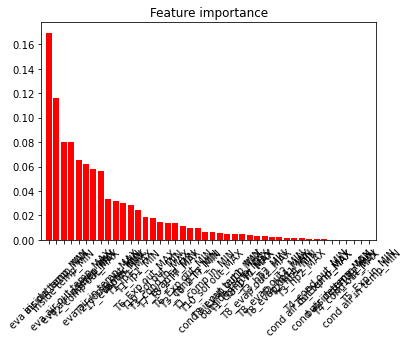

In [64]:
importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

print("Feature ranking")

for f in range(train_data_X.shape[1]) :
    print("{}. feature {} ({:.3f})".format(f+1, train_data_X.columns[indices][f], importance[indices[f]]))
    
plt.figure()
plt.title("Feature importance")
plt.bar(range(train_data_X.shape[1]), importance[indices], color='r', align='center')
plt.xticks(range(train_data_X.shape[1]), train_data_X.columns[indices], rotation=45)
plt.xlim([-1, train_data_X.shape[1]])
plt.show()

In [75]:
from sklearn.metrics import accuracy_score

pred = forest.predict(test_data_X)
accuracy = accuracy_score(test_data_y, pred)
print('{:4f}'.format(accuracy))

0.999778


Feautre selection : random forest

In [76]:
# feature selection
from sklearn.feature_selection import RFECV, RFE

forest2 = RandomForestClassifier()
rfecv = RFECV(estimator=forest2, step=1, cv=5, scoring='accuracy', verbose=2)
rfecv.fit(train_data_X, train_data_y)


Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 fe

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy', verbose=2)

6
optimial number of features : 6


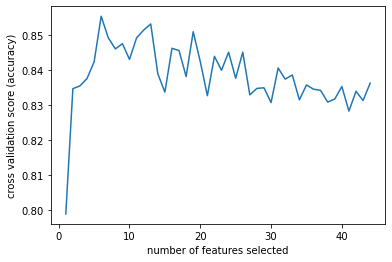

In [79]:
print(rfecv.support_.sum())

print('optimial number of features : %d' % rfecv.n_features_)

plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score (accuracy)")
plt.plot(
range(1, len(rfecv.grid_scores_)*1 + 1, 1), rfecv.grid_scores_,
)

In [80]:
print(rfecv.ranking_)

[ 7  9 31 24 22 32 13 19  1  5 11 12 30 28 39 37 16 10  3  1 14 21 18 23
 17 20  1  1  6  8 38 35  1  2  1  4 34 36 27 26 33 29 15 25]


In [81]:
print(rfecv.estimator_.feature_importances_ )

[0.13362247 0.0930181  0.17105192 0.16850955 0.08900241 0.34479556]


In [89]:
mask = rfecv.get_support()
features = np.array(train_data_X.columns)
best_features = features[mask]

print('all_features : ', train_data_X.shape[1])
print(features)
print()
print('Selected best : ', best_features.shape[0])
print(features[mask])

all_features :  44
['T1_lp1_MIN' 'T1_lp1_MAX' 'T2_hp1_MIN' 'T2_hp1_MAX' 'T3_hp2_MIN'
 'T3_hp2_MAX' 'T1_comp in_MIN' 'T1_comp in_MAX' 'T2_comp out_MIN'
 'T2_comp out_MAX' 'T3_cond in_MIN' 'T3_cond in_MAX' 'T4_cond out_MIN'
 'T4_cond out_MAX' 'T5_Exp in_MIN' 'T5_Exp in_MAX' 'T6_Exp out_MIN'
 'T6_Exp out_MAX' 'T7_evap in_MIN' 'T7_evap in_MAX' 'T8_evap out1_MIN'
 'T8_evap out1_MAX' 'T8_evap out2_MIN' 'T8_evap out2_MAX'
 'T10_sol out_MIN' 'T10_sol out_MAX' 'inside temp_MIN' 'inside temp_MAX'
 'center_MIN' 'center_MAX' 'outside temp_MIN' 'outside temp_MAX'
 'eva air in temp_MIN' 'eva air in temp_MAX' 'eva air out temp_MIN'
 'eva air out temp_MAX' 'cond air in temp_MIN' 'cond air in temp_MAX'
 'cond air out temp_MIN' 'cond air out temp_MAX' 'T8_1-T7_MIN'
 'T8_1-T7_MAX' 'T8_2-T7_MIN' 'T8_2-T7_MAX']

Selected best :  6
['T2_comp out_MIN' 'T7_evap in_MAX' 'inside temp_MIN' 'inside temp_MAX'
 'eva air in temp_MIN' 'eva air out temp_MIN']


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

selected_train_X = train_data_X.loc[:,['T2_comp out_MIN', 'T7_evap in_MAX', 'inside temp_MIN', 'inside temp_MAX', 
                                    'eva air in temp_MIN', 'eva air out temp_MIN']]
selected_test_X = test_data_X.loc[:,['T2_comp out_MIN', 'T7_evap in_MAX', 'inside temp_MIN', 'inside temp_MAX', 
                                    'eva air in temp_MIN', 'eva air out temp_MIN']]
forest_selected = RandomForestClassifier()
forest_selected.fit(selected_train_X, train_data_y)
pred_for_selected = forest_selected.predict(selected_test_X)
saccuracy = accuracy_score(test_data_y, pred_for_selected)
print('{:4f}'.format(saccuracy))

0.999399


In [40]:
#회사에서 언급한 것들 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998829


In [41]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX',
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX'
                              , 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998861


In [42]:
#=입출구 차 , 고내온도, 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX',
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX'
                              , 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998576


In [47]:
#회사에서 언급한 것들 + 입출구 차 학습 후(min) 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN','T8_evap out1_MIN', 
                                 'T8_evap out2_MIN',  'inside temp_MIN',
                                 'T8_1-T7_MIN',  'T8_2-T7_MIN']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T8_evap out1_MIN',  
                                 'T8_evap out2_MIN',  'inside temp_MIN', 
                               'T8_1-T7_MIN',  'T8_2-T7_MIN']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998512


In [48]:
#회사에서 언급한 것들 + 입출구 차 학습(max) 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MAX',  'T8_evap out1_MAX', 
                                 'T8_evap out2_MAX',  'inside temp_MAX',
                                 'T8_1-T7_MAX',  'T8_2-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MAX',  'T8_evap out1_MAX', 
                                  'T8_evap out2_MAX','inside temp_MAX'
                              , 'T8_1-T7_MAX', 'T8_2-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998702


In [49]:
#회사에서 언급한 것들 학습 후 결과(센서 1번) rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'inside temp_MIN', 'inside temp_MAX',
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX',]]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                               'inside temp_MIN', 'inside temp_MAX',
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX', ]]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998702


In [50]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과(센서 2번) rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX',
                                'T8_2-T7_MIN', 'T8_2-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX',
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX',
                               'T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.998861


In [52]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX']]
sfor_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.882826


In [53]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T8_evap out1_MIN', 'T8_evap out1_MAX']]
sfor_x_com= test_data_X.loc[:,['T8_evap out1_MIN', 'T8_evap out1_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.787903


In [54]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,[
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX']]
sfor_x_com= test_data_X.loc[:,['T8_evap out2_MIN', 'T8_evap out2_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.839463


In [55]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX']]
sfor_x_com= test_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.943502


In [56]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.892100


In [57]:
#회사에서 언급한 것들 + 입출구 차 학습 후 결과 rbf 커널 사용
sfor_X_com = train_data_X.loc[:,['T8_2-T7_MIN', 'T8_2-T7_MAX']]
sfor_x_com= test_data_X.loc[:,['T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_for = RandomForestClassifier()
selected_for.fit(sfor_X_com , train_data_y)
pred_for_for = selected_for.predict(sfor_x_com)
for_acc= accuracy_score(test_data_y, pred_for_for)
print('{:4f}'.format(for_acc))

0.941286


random forest의 경우, 출입구 온도센서 값 + 고내 온도 + 출입구 온도센서 차이를 사용했을 때, 가장 높은 정확도를 보임

min, max값을 따로 사용할 경우, 정확도가 하락함. 만약, 하나만 사용한다면 max값이 더 나을듯

센서를 하나만 쓴다면, 2번센서가 좋음

값을 하나만 쓴다면 2번 센서와의 차이가 가장 좋음

feature selection : SVM

In [6]:
# feature selection
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, RFE

svc = SVC(kernel='linear')
rfecv2 = RFECV(estimator=svc, step=1, cv=5, scoring='accuracy', verbose=2)
rfecv2.fit(train_data_X, train_data_y)


Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 fe

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

RFECV(cv=5, estimator=SVC(kernel='linear'), scoring='accuracy', verbose=2)

2
optimial number of features : 2


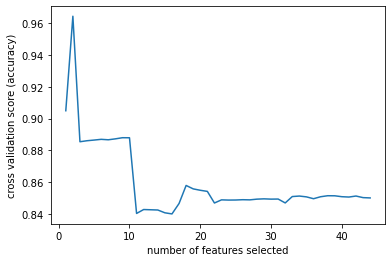

In [11]:
import matplotlib.pyplot as plt
print(rfecv2.support_.sum())

print('optimial number of features : %d' % rfecv2.n_features_)

plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score (accuracy)")
plt.plot(
range(1, len(rfecv2.grid_scores_)*1 + 1, 1), rfecv2.grid_scores_,
)

In [13]:
import numpy as np
mask2 = rfecv2.get_support()
features = np.array(train_data_X.columns)
best_features2 = features[mask2]

print('all_features : ', train_data_X.shape[1])
print(features)
print()
print('Selected best : ', best_features2.shape[0])
print(features[mask2])

all_features :  44
['T1_lp1_MIN' 'T1_lp1_MAX' 'T2_hp1_MIN' 'T2_hp1_MAX' 'T3_hp2_MIN'
 'T3_hp2_MAX' 'T1_comp in_MIN' 'T1_comp in_MAX' 'T2_comp out_MIN'
 'T2_comp out_MAX' 'T3_cond in_MIN' 'T3_cond in_MAX' 'T4_cond out_MIN'
 'T4_cond out_MAX' 'T5_Exp in_MIN' 'T5_Exp in_MAX' 'T6_Exp out_MIN'
 'T6_Exp out_MAX' 'T7_evap in_MIN' 'T7_evap in_MAX' 'T8_evap out1_MIN'
 'T8_evap out1_MAX' 'T8_evap out2_MIN' 'T8_evap out2_MAX'
 'T10_sol out_MIN' 'T10_sol out_MAX' 'inside temp_MIN' 'inside temp_MAX'
 'center_MIN' 'center_MAX' 'outside temp_MIN' 'outside temp_MAX'
 'eva air in temp_MIN' 'eva air in temp_MAX' 'eva air out temp_MIN'
 'eva air out temp_MAX' 'cond air in temp_MIN' 'cond air in temp_MAX'
 'cond air out temp_MIN' 'cond air out temp_MAX' 'T8_1-T7_MIN'
 'T8_1-T7_MAX' 'T8_2-T7_MIN' 'T8_2-T7_MAX']

Selected best :  2
['center_MAX' 'eva air in temp_MIN']


In [24]:
#선택된 피처로 학습 후 결과

ssvm_train_X = train_data_X.loc[:,['center_MAX', 'eva air in temp_MIN']]
ssvm_test_X = test_data_X.loc[:,['center_MAX', 'eva air in temp_MIN']]
selected_svc = SVC(kernel='linear')
selected_svc.fit(ssvm_train_X, train_data_y)
pred_for_ssvc = selected_svc.predict(ssvm_test_X )
saccuracy2 = accuracy_score(test_data_y, pred_for_ssvc)
print('{:4f}'.format(saccuracy2))

0.983794


In [26]:
#선택된 피처로 학습 후 결과 rbf 커널 사용
ssvm_train_X = train_data_X.loc[:,['center_MAX', 'eva air in temp_MIN']]
ssvm_test_X = test_data_X.loc[:,['center_MAX', 'eva air in temp_MIN']]
selected_svc2 = SVC(kernel='rbf')
selected_svc2.fit(ssvm_train_X, train_data_y)
pred_for_ssvc2 = selected_svc2.predict(ssvm_test_X )
saccuracy3 = accuracy_score(test_data_y, pred_for_ssvc2)
print('{:4f}'.format(saccuracy3))

0.989713


In [29]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.991834


In [31]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.990789


In [66]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX'
                                 , 'inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX'
                               ,'inside temp_MIN', 'inside temp_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.995157


In [43]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX','inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX','inside temp_MIN', 'inside temp_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.994936


In [44]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX', 'T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.980819


In [34]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995600


In [35]:
#회사에서 언급한 것들 (min) 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T8_evap out1_MIN', 
                                 'T8_evap out2_MIN', 'inside temp_MIN' ]]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T8_evap out1_MIN',  
                                 'T8_evap out2_MIN',  'inside temp_MIN']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995727


In [36]:
#회사에서 언급한 것들 (max)학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MAX', 'T8_evap out1_MAX', 
                                  'T8_evap out2_MAX', 'inside temp_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MAX', 'T8_evap out1_MAX', 
                                  'T8_evap out2_MAX', 'inside temp_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995569


In [37]:
#회사에서 언급한 것들(출구 센서 1번만 사용) 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                  'inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'inside temp_MIN', 'inside temp_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995854


In [67]:
#회사에서 언급한 것들(출구 센서 1번만 사용) 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX','inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 'T8_1-T7_MIN', 'T8_1-T7_MAX','inside temp_MIN', 'inside temp_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995379


In [38]:
#회사에서 언급한 것들(출구센서 2번만 사용) 학습 후 결과 rdf 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX',  
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX',
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX', 'inside temp_MIN', 'inside temp_MAX']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995632


In [39]:
#회사에서 언급한 것들(출구 센서 1번만 사용, min) 학습 후 결과 rbf 커널 사용
ssvm_X_com = train_data_X.loc[:,['T7_evap in_MIN', 'T8_evap out1_MIN',  
                                  'inside temp_MIN' ]]
ssvm_x_com= test_data_X.loc[:,['T7_evap in_MIN', 'T8_evap out1_MIN', 
                                 'inside temp_MIN']]
selected_svc3 = SVC(kernel='rbf')
selected_svc3.fit(ssvm_X_com, train_data_y)
pred_for_ssvc3 = selected_svc3.predict(ssvm_x_com)
saccuracy4 = accuracy_score(test_data_y, pred_for_ssvc3)
print('{:4f}'.format(saccuracy4))

0.995949


In [58]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T7_evap in_MIN', 'T7_evap in_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.847313


In [59]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 ]]
ssvm_x_com2= test_data_X.loc[:,['T8_evap out1_MIN', 'T8_evap out1_MAX', 
                                 ]]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.769482


In [60]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,[
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX']]
ssvm_x_com2= test_data_X.loc[:,[
                                 'T8_evap out2_MIN', 'T8_evap out2_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.821612


In [61]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX',]]
ssvm_x_com2= test_data_X.loc[:,['T8_1-T7_MIN', 'T8_1-T7_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.782775


In [62]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['T8_2-T7_MIN', 'T8_2-T7_MAX']]
ssvm_x_com2= test_data_X.loc[:,['T8_2-T7_MIN', 'T8_2-T7_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.922105


In [63]:
#회사에서 언급한 것들로 학습 후 결과 rbf 커널 사용, 차 사용
ssvm_X_com2 = train_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX']]
ssvm_x_com2= test_data_X.loc[:,['inside temp_MIN', 'inside temp_MAX']]
selected_svc4 = SVC(kernel='rbf')
selected_svc4.fit(ssvm_X_com2, train_data_y)
pred_for_ssvc4 = selected_svc4.predict(ssvm_x_com2)
saccuracy5 = accuracy_score(test_data_y, pred_for_ssvc4)
print('{:4f}'.format(saccuracy5))

0.939767


svm 은 센서를 사용할 때, 회사에서 언급한 센서 (입출구 센서, 고내온도, 입출구 차이)를 사용할 때, min 값을 사용하면 성능이 올라감

만약 min, max를 다 같이 사용할 경우, 출구 센서 1번만 사용하는 것이 더 유리함

출구 센서 1번만 사용하면서 min 값만 사용할 경우, 성능이 더 상승하는 것을 확인함
